In [95]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

In [96]:
def integrate(f, a, b, method, N):
	h = (b - a) / N
	left = a
	right = a + h
	I = 0
	for i in range(N):
		I += method(f, left, right)
		left += h
		right += h
	return I

# Trapezoidal method
$\frac{f(a) + f(b)}{2}*(b-a)$

In [97]:
trapezoidal_method = lambda f, a, b: (f(a) + f(b)) / 2 * (b - a)

# Simpson method
$\left( f(a) + 4*f(\frac{a+b}{2}) + f(b) \right) * \frac{(b-a)}{6}$

In [98]:
simpson_method = lambda f, a, b: (f(a) + 4 * f((a + b) / 2) + f(b)) * (b - a) / 6

# First Integral
$I = \int_{-1}^{1} \frac{dx}{1+x^2}$

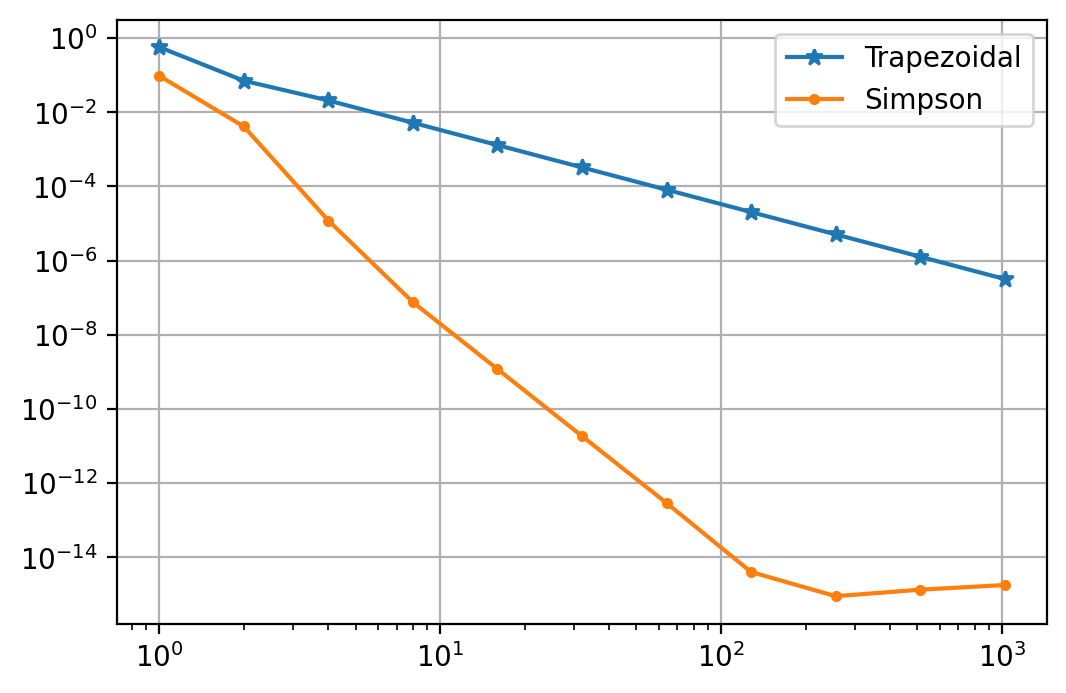

In [99]:
import math

N = np.array([2 ** i for i in range(11)])
exact_root = [math.pi / 2] * N.size
f1 = lambda x: 1 / (1 + x ** 2)
history = {trapezoidal_method: [], simpson_method: []}
for n in N:
	trapezoidal_root = integrate(f1, -1, 1, trapezoidal_method, n)
	simpson_root = integrate(f1, -1, 1, simpson_method, n)
	history[trapezoidal_method].append(trapezoidal_root)
	history[simpson_method].append(simpson_root)
# plt.plot(N, exact_root, label='Exact root')
plt.plot(N, np.abs(np.array(exact_root) - np.array(history[trapezoidal_method])), label='Trapezoidal', marker='*')
plt.plot(N, np.abs(np.array(exact_root) - np.array(history[simpson_method])), label='Simpson', marker='.')
plt.xticks(N)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()

# Second integral
$I = \int_{0}^{1}x^{1/3}e^{sinx}dx$

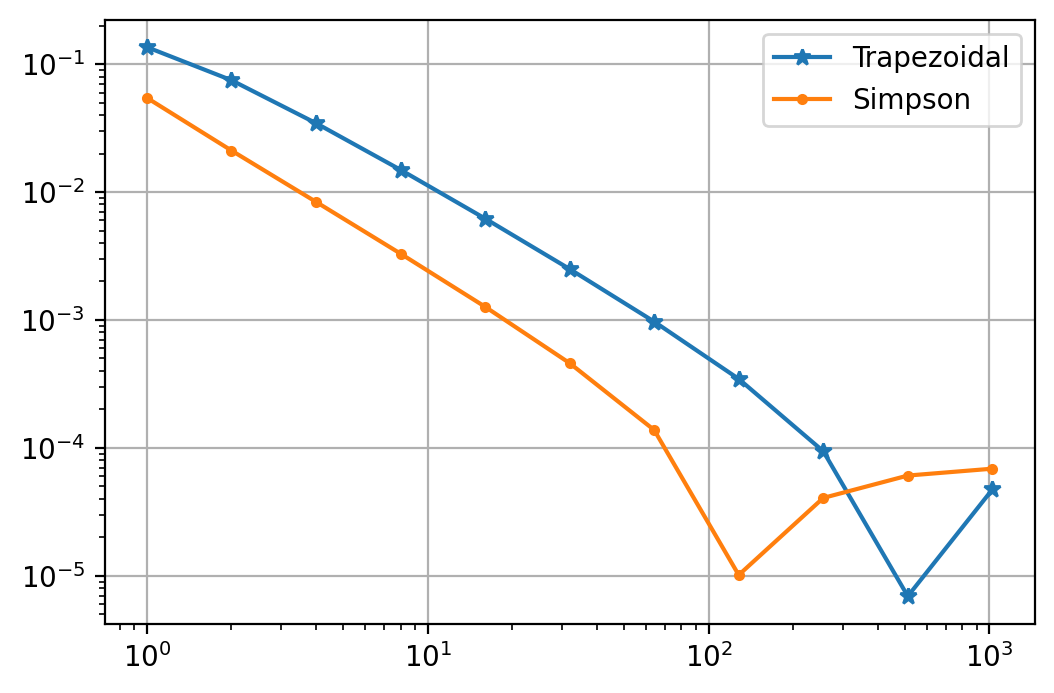

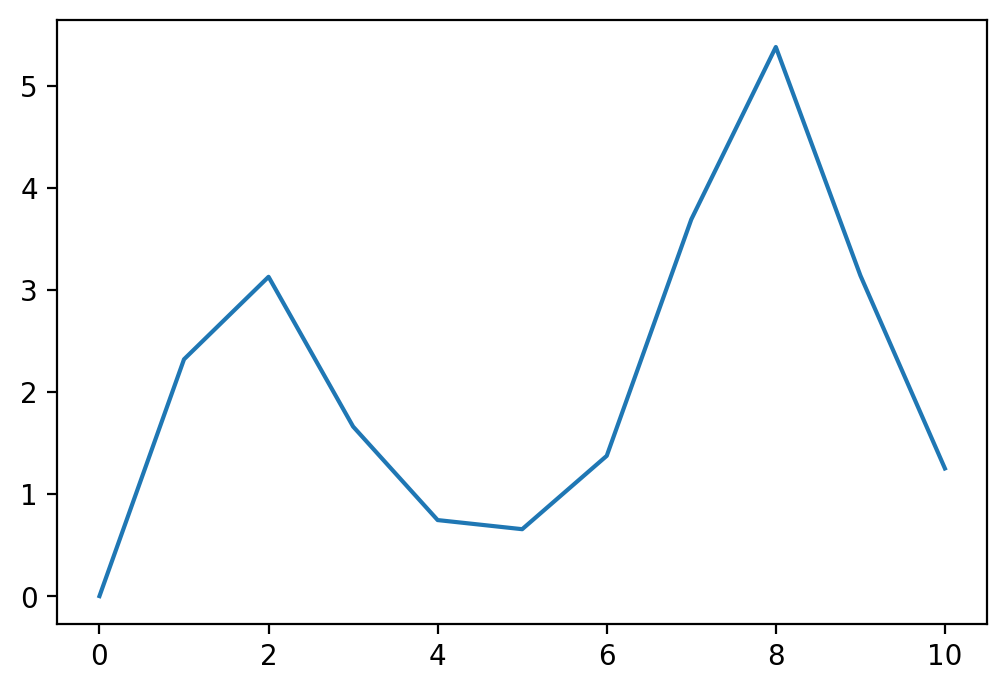

In [100]:
exact_root = [1.2958] * N.size
f2 = lambda x: np.power(x, 1 / 3) * np.exp(np.sin(x))
history = {trapezoidal_method: [], simpson_method: []}
for n in N:
	trapezoidal_root = integrate(f2, 0, 1, trapezoidal_method, n)
	simpson_root = integrate(f2, 0, 1, simpson_method, n)
	history[trapezoidal_method].append(trapezoidal_root)
	history[simpson_method].append(simpson_root)
# plt.plot(N, exact_root, label='Exact root')
plt.plot(N, np.abs(np.array(exact_root) - np.array(history[trapezoidal_method])), label='Trapezoidal', marker='*')
plt.plot(N, np.abs(np.array(exact_root) - np.array(history[simpson_method])), label='Simpson', marker='.')
plt.xticks(N)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()
plt.plot(np.array([(x ** (1/3)) * np.exp(np.sin(x)) for x in range(N.size)]))